# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow


In [ ]:
what_were_covering = {1: "data (prepare and load",
                       2: "build model",
                       3: "fitting the model to data (training)",
                       4: "making predictions and evaluating a model (inference)",
                       5: "saving and loading a model",
                       6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks 
import matplotlib.pyplot as plt
import numpy as np

# check PyTorch version 
torch.__version__

'1.13.0+cu116'

kaiser_window,
## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio like songs or podcasts 
* dna
* Text

Machine learning is a game of 2 parts:
1. get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**



In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02 
X = torch.arange(start, end, step).unsqueeze(dim = 1)
Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(Y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data



In [ ]:
# Create a tain/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], Y[:train_split]
X_test, y_test = X[train_split:], Y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, Visualize, Visualize!"

In [ ]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data= X_test,
                    test_labels = y_test,
                    predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the prediction if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

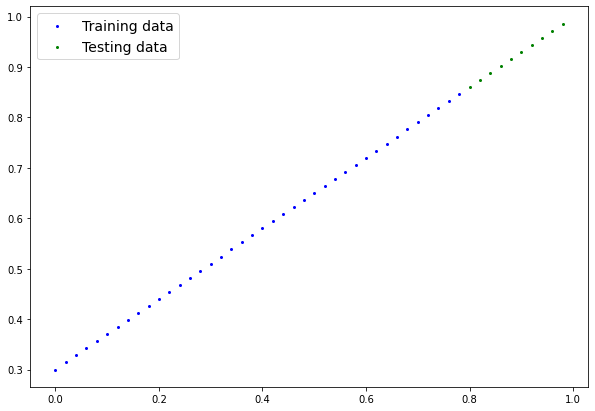

In [ ]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data

How does is do so?

Through 2 main algorithms:
1. Gradient descent
2. Backpropagation


In [ ]:
import torch
from torch import nn

# Create linear reression model class
class LinearRegressionModel (nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()

    #initialize model parameters
    self.weights = nn.Parameter(torch.randn(1, 
                                            requires_grad=True,
                                            dtype = torch.float))
    
    self.bias = nn.Parameter(torch.randn(1,
                             requires_grad=True,
                             dtype=torch.float))
    
  #Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula


### PyTorch model building essentials 

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation



### Checking the contents of our PyTorch model

Now we've created our model, let's see what's inside

So we can check our modeel parameters or what's inside our model using `.parameters()`


In [ ]:
# Create a random seed 
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#check the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`

When we pass data through our model, it's going to run it throu the `forward()` method

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

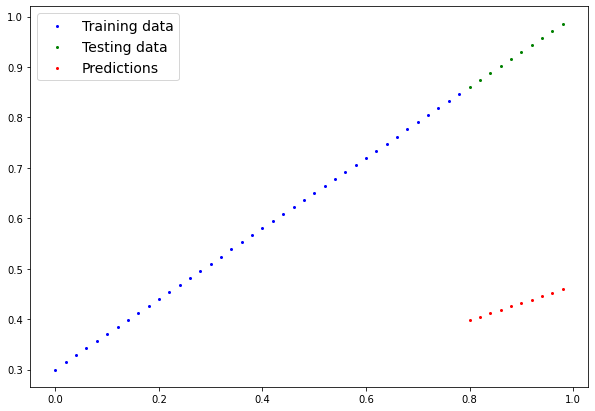

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for amodel to move from some *unknown paramaters (these may be random) to some *known* parameters

or in other words, from a poor representation of the data, to a better representation of the data

One way to measure how poor or how wrong your models predictions are is to use a loss function

* note: Loss function may also be called cost function or criterion in different areas

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model't parameters(e.g weight & bias) to improve the loss function.

And specifically for PyTorch we need:

* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# check our model's parameters (a value that the model stes itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setups an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)  # lr = learning rate = possibly the most important hyperparameter you can set


### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data 
1. Forward pass (involves data moving through model's `forward()` function(s))  to make predictions on data- also called Forward Propogation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backward through the network to calculate the gradients of each of the parameters of the model with respect to the loss (**backpropagation**)
5. Optimizer step - use optimizer to adjust our model't parameters to try to minimize the loss (**gradient descent**)


In [ ]:
# An epoch is one loop through the data... ( this is a hyperparameter because we set it ourselves)
epochs = 200

# track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad (zeros the gradients, they accumulate by default)
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() #by default how the optimizer changes will accumulate through the loop so we have to zero them in step 3

  ### Testing
  model_0.eval() # turns off gradient tracking, turns off settings not needed for testing and evaluation (dropout, BatchNorm)

  with torch.inference_mode(): #turns off gradient tracking and a couple other things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # print out whats happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Test: {loss} | Test Loss: {test_loss}")
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    # Print out model state_dict()
    print(model_0.state_dict())


Epoch: 0 | Test: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Test: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Test: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Test: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Test: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Test: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Test: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
  

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

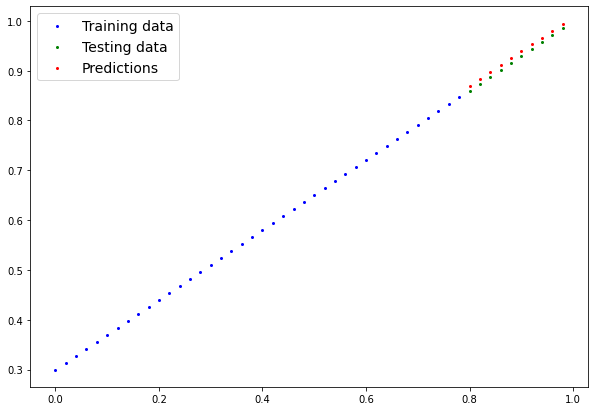

In [ ]:
plot_predictions(predictions=y_preds_new)

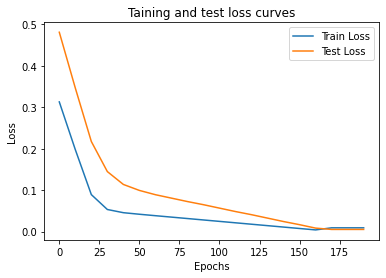

In [ ]:
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).cpu().numpy()), label="Test Loss")
plt.title("Taining and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## 4. Saving a model in PyTorch

There are three main methods to know about for saving and loading models in PyTorch

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1207 Dec 21 19:11 01_pytorch_workflow_model_0.pth
-rw-r--r-- 1 root root 1271 Dec 21 19:11 01_pytorch_workflow_model_1.pth


## 5. Loading a PyTorch model

Since we saved our model't `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that

In [ ]:
# To Load in saved state_dict, instantiate a new instance of our model class 
loaded_model_0 = LinearRegressionModel()

# load thesaved state_dict of model_0 and update the new model with it
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
model_0.state_dict(), loaded_model_0.state_dict()

(OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]),
 OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]))

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back and see all the steps in one place

In [ ]:
# impoort PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#check PyTorch version
torch.__version__

'1.13.0+cu116'

Create device-agnostic code.

if we have a gpu, use it for faster computations, else default to cpu

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = .7
bias = .3

#create range values
start = 0
end = 1
step = .02

# create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# split the data
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

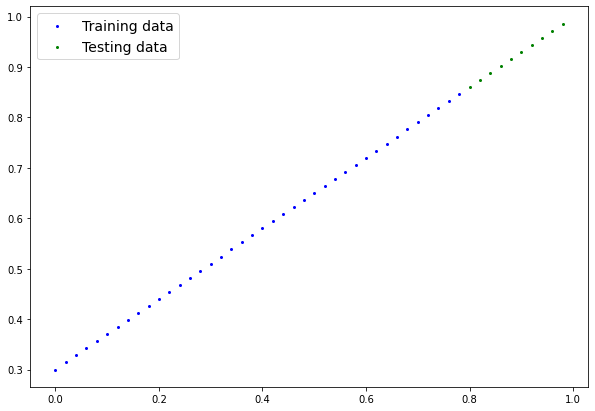

In [ ]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear Model

In [ ]:
# create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / aslo called: linear transform, probing layer, fully connected layer, dense layer(in tensorflow)
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1 )
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* loss function
* optimizer
* Training loop
* Testing loop


In [ ]:
loss_fn = nn.L1Loss() # same as MAE

# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=.01)

In [ ]:
# Lets write a training loop
torch.manual_seed(42)

epochs = 200

# set data to use device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # forward step
  y_pred = model_1(X_train)

  # calculate the loss
  loss = loss_fn(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # back propogation
  loss.backward()

  # optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  #Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | loss: {loss} | test loss: {test_loss}")




Epoch: 0 | loss: 0.5551779866218567 | test loss: 0.5739762187004089
Epoch: 10 | loss: 0.439968079328537 | test loss: 0.4392664134502411
Epoch: 20 | loss: 0.3247582018375397 | test loss: 0.30455657839775085
Epoch: 30 | loss: 0.20954833924770355 | test loss: 0.16984669864177704
Epoch: 40 | loss: 0.09433845430612564 | test loss: 0.03513690456748009
Epoch: 50 | loss: 0.023886388167738914 | test loss: 0.04784907028079033
Epoch: 60 | loss: 0.019956795498728752 | test loss: 0.045803118497133255
Epoch: 70 | loss: 0.016517987474799156 | test loss: 0.037530567497015
Epoch: 80 | loss: 0.013089174404740334 | test loss: 0.02994490973651409
Epoch: 90 | loss: 0.009653178043663502 | test loss: 0.02167237363755703
Epoch: 100 | loss: 0.006215683650225401 | test loss: 0.014086711220443249
Epoch: 110 | loss: 0.00278724217787385 | test loss: 0.005814164876937866
Epoch: 120 | loss: 0.0012645035749301314 | test loss: 0.013801801018416882
Epoch: 130 | loss: 0.0012645035749301314 | test loss: 0.013801801018416

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### 6.4 Making and evaluating predicitons

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

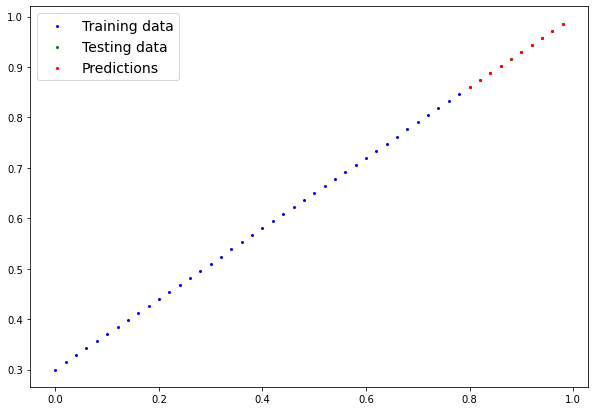

In [ ]:
# check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 saving and loading the trained model

In [ ]:
from pathlib import Path
# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save model state dict
print(f"Saving to: {MODEL_SAVE_PATH}")
torch.save(model_1.state_dict(), 
           MODEL_SAVE_PATH)

Saving to: models/01_pytorch_workflow_model_1.pth


In [ ]:
# instantiate new LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# load the state dict and update the new instance with it
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercises

(tensor([[0.0000],
         [0.2500],
         [0.5000],
         [0.7500],
         [1.0000]]), tensor([[0.9000],
         [0.9750],
         [1.0500],
         [1.1250],
         [1.2000]]))

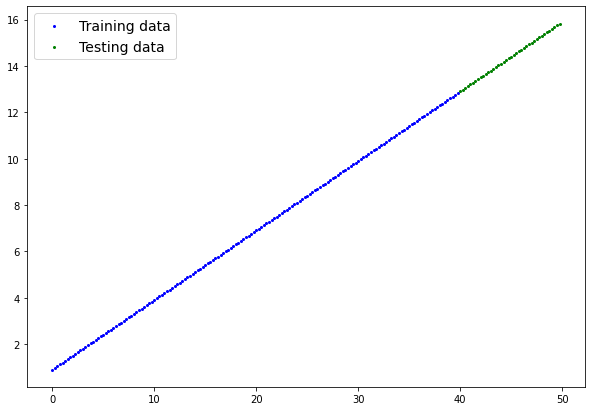

In [ ]:
# create strain line data set with weight = .3 and bias = .9
weight = 0.3
bias = 0.9

start = 0
end = 50
step = .25

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

train_split = int(len(X) * .8)

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

plot_predictions(X_train, y_train, X_test, y_test)
X_train[:5], y_train[:5]

In [ ]:
# create a linear model by subclassing nn.Module
class LinearRegressionModelExercise(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / aslo called: linear transform, probing layer, fully connected layer, dense layer(in tensorflow)
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1 )
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_exercise = LinearRegressionModelExercise()
model_exercise, model_exercise.state_dict()

(LinearRegressionModelExercise(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
loss_fn = nn.L1Loss() # same as MAE

# Setup optimizer
optimizer = torch.optim.SGD(params=model_exercise.parameters(),
                            lr=.01)

In [ ]:
# Lets write a training loop
torch.manual_seed(42)

epochs = 300

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# set data to use device
model_exercise.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_exercise.train()

  # forward step
  y_pred = model_exercise(X_train)

  # calculate the loss
  loss = loss_fn(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # back propogation
  loss.backward()

  # optimizer step
  optimizer.step()

  ### Testing
  model_exercise.eval()
  with torch.inference_mode():
    test_pred = model_exercise(X_test)

    test_loss = loss_fn(test_pred, y_test)

  #Print out what's happening
  if epoch % 20 == 0:
    print(f"Epoch: {epoch} | loss: {loss} | test loss: {test_loss}")

model_exercise.state_dict()

Using device: cuda
Epoch: 0 | loss: 9.163585662841797 | test loss: 11.847392082214355
Epoch: 20 | loss: 1.3240737915039062 | test loss: 5.826596736907959
Epoch: 40 | loss: 1.3919464349746704 | test loss: 5.680108547210693
Epoch: 60 | loss: 1.4442873001098633 | test loss: 5.573768138885498
Epoch: 80 | loss: 1.4862645864486694 | test loss: 5.484633922576904
Epoch: 100 | loss: 1.5282423496246338 | test loss: 5.3954997062683105
Epoch: 120 | loss: 1.556402564048767 | test loss: 5.341014862060547
Epoch: 140 | loss: 1.5786373615264893 | test loss: 5.295190811157227
Epoch: 160 | loss: 1.6008720397949219 | test loss: 5.249366760253906
Epoch: 180 | loss: 1.623106837272644 | test loss: 5.2035441398620605
Epoch: 200 | loss: 1.6453415155410767 | test loss: 5.157719612121582
Epoch: 220 | loss: 1.6553491353988647 | test loss: 5.141203880310059
Epoch: 240 | loss: 1.6639931201934814 | test loss: 5.124688148498535
Epoch: 260 | loss: 1.6726369857788086 | test loss: 5.10817289352417
Epoch: 280 | loss: 1.6

OrderedDict([('linear_layer.weight', tensor([[0.3865]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8701], device='cuda:0'))])

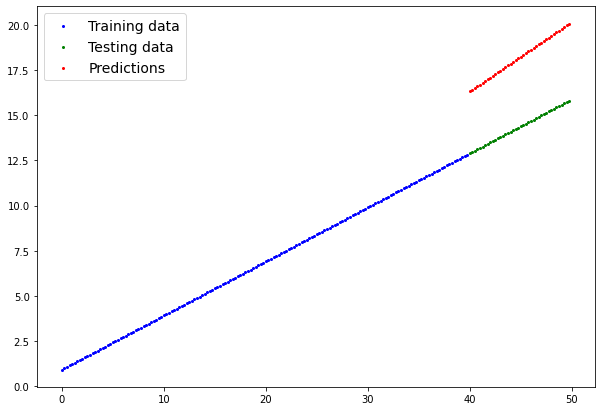

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# make predictions on the test data
with torch.inference_mode():
  y_preds = model_exercise(X_test)

# check out our model predictions visually
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), predictions=y_preds.cpu())

In [ ]:
# save the model state dict
PATH_NAME = Path("models")
PATH_NAME.mkdir(parents=True, exist_ok=True)

FILE_NAME = "01_pytorch_workflow_model_exercise.pth"

MODEL_SAVE_PATH = PATH_NAME / FILE_NAME

torch.save(model_exercise.state_dict(),
           MODEL_SAVE_PATH)


In [ ]:
# load and evaluate model
loaded_model_exercise = LinearRegressionModelExercise()

loaded_model_exercise.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_exercise.to(device)

# evaluate loaded model
loaded_model_exercise.eval()
with torch.inference_mode():
  loaded_model_exercise_preds = loaded_model_exercise(X_test)

y_preds == loaded_model_exercise_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')